# プラズマ応用実験I　
## コロナ放電

In [51]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

excel_name = "24_プラズマ.xlsx"
df = pd.read_excel(excel_name,sheet_name = 0,header = 1)


In [52]:
df

,-V(kV),I(mA),Unnamed: 2,-V(kV),I(mA).1,Unnamed: 5,a(mm),b(mm),Unnamed: 8,9.500000000000002,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,11000,-6431328.873749254
0,25.0,0.13900,NaN,NaN,NaN,NaN,9.883333,0.294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,24.0,0.12100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3Mの時のV0,NaN
2,23.0,0.10500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5131.132406,NaN
3,22.0,0.09000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21.0,0.07600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,20.0,0.06500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,19.0,0.05200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,18.0,0.04200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,17.0,0.03000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,16.0,0.02200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 測定値

In [53]:
I = df['I(mA)'][0:16]
V = df['-V(kV)'][0:16]
print(I)
#print(V)

0     0.13900
1     0.12100
2     0.10500
3     0.09000
4     0.07600
5     0.06500
6     0.05200
7     0.04200
8     0.03000
9     0.02200
10    0.01500
11    0.01000
12    0.00600
13    0.00300
14    0.00100
15    0.00001
Name: I(mA), dtype: float64


## 理論値フィッティング

In [54]:
##フィッティングに使うもの
from scipy.optimize import curve_fit



def nonlinear_fit(v,a,v_th0):
    return  a*(v-v_th0)*v

#開始電圧を11kVにした場合
def fit_vth_10(v,a):
    return a*(v-10)*v

param, cov = curve_fit(nonlinear_fit,V,I)
param_v10,cov_v10 = curve_fit(fit_vth_10,V,I)

In [55]:
v_th = np.linspace(10,26,100)


i_th = param[0]*(v_th-param[1])*v_th
print(param[0])
print(param[1])

i_th_10 = param_v10[0]*(v_th-10)*v_th
print(param_v10[0])


0.00041421288845937726
12.046371781699081
0.00034069441249977804


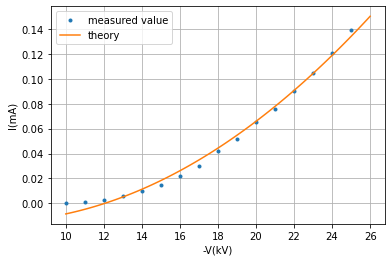

In [56]:
plt.plot(V,I, '.',label = 'measured value')
plt.plot(v_th,i_th,label='theory')
plt.ylabel("I(mA)")
plt.xlabel("-V(kV)")
plt.legend()
#plt.ylim(0,0.16)
plt.grid()
plt.savefig('corona_IV.png')

In [88]:
y_error = [0.002 for i in range(len(I))]



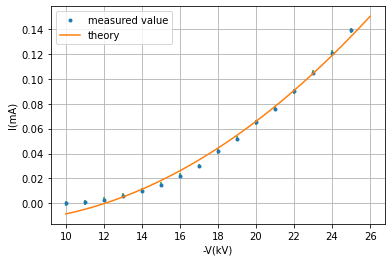

In [89]:
plt.plot(V,I, '.',label = 'measured value')
plt.plot(v_th,i_th,label='theory')
plt.errorbar(V,I, yerr=y_error,linestyle = "None")
plt.ylabel("I(mA)")
plt.xlabel("-V(kV)")
plt.legend()
#plt.ylim(0,0.16)
plt.grid()
plt.savefig('corona_IV.png')

### 放電開始電圧を10ｋV としてフィッティングするとかなり誤差が大きくなる　→　装置の規格によりそう？

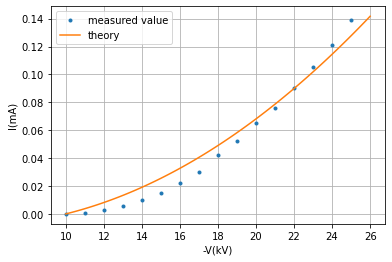

In [37]:
plt.plot(V,I, '.',label = 'measured value')
plt.plot(v_th,i_th_10,label='theory')
plt.ylabel("I(mA)")
plt.xlabel("-V(kV)")
plt.legend()
#plt.ylim(0,0.16)
plt.grid()
plt.savefig('corona_IV11.png')


## 誤差の検証

In [38]:
i_th = param[0]*(V-param[1])*V

diff = (I - i_th)*100/i_th
print(diff)

0        3.623857
1        1.824146
2        0.618968
3       -0.776440
4       -2.417569
5       -1.350596
6       -4.980078
7       -5.382501
8      -13.994680
9      -16.037906
10     -18.262648
11     -11.731360
12      16.843672
13   -1401.555279
14    -120.974793
15    -100.117976
dtype: float64


(-100.0, 10.0)

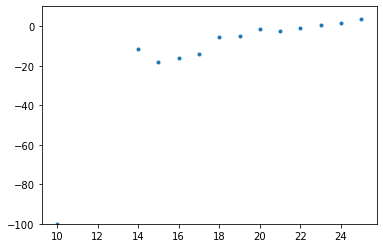

In [39]:
plt.plot(V,diff,'.')
plt.ylim(-100,10)

In [40]:
i_th_10 = param_v10[0]*(V-10)*V

diff = (I - i_th_10)*100/i_th_10
print(diff)

0      8.797401
1      5.701483
2      3.074942
3      0.063012
4     -3.431252
5     -4.606595
6    -10.743013
7    -14.390534
8    -26.003823
9    -32.735420
10   -41.296366
11   -47.586041
12   -54.843359
13   -63.310229
14   -73.316530
15          inf
dtype: float64


## コロナ放電　電気集塵

In [103]:
df2 = pd.read_excel(excel_name, sheet_name = 2,skiprows=2)
df2

,Q = 28.5,N0,Nr,dust num,eta,Q = 19,N0.1,Nr.1,dust num.1,eta.1,Q = 10,N0.2,Nr.2,dust num.2,eta.2
0,0,38560000,39060000,-500000,NaN,NaN,38620000,37260000,1360000,NaN,NaN,38200000,37080000,1120000,NaN
1,-15,37920000,19480000,18940000,0.486287,NaN,37140000,22840000,12940000,0.385030,NaN,34160000,14380000,18660000,0.579040
2,-18,37480000,21960000,16020000,0.414088,NaN,36960000,15220000,20380000,0.588203,NaN,31840000,11540000,19180000,0.637563
3,-20,37720000,11960000,26260000,0.682927,NaN,35020000,13800000,19860000,0.605939,NaN,22320000,7274000,13926000,0.674104
4,-22,37580000,17540000,20540000,0.533262,NaN,36140000,10796000,23984000,0.701273,NaN,22674000,9676000,11878000,0.573256
5,-25,37800000,8834000,29466000,0.766296,NaN,26400000,6944000,18096000,0.736970,NaN,16500000,2940000,12440000,0.821818
6,size of dust5e-7,N0,Nr,dust num,NaN,NaN,N0,Nr,dust num,NaN,NaN,N0,Nr,dust num,NaN
7,0,5238470.776621,5465916.733387,-227445.956765,NaN,NaN,5678086.469175,5280904.723779,397181.745396,NaN,NaN,5802417.934347,5384019.215372,418398.718975,NaN
8,-15,5198158.526821,1590424.339472,3835180.144115,0.694041,NaN,5284299.439552,2095388.310649,2791729.383507,0.603469,NaN,4483146.517214,1159295.436349,2905452.36189,0.741410
9,-18,5048000,1454000,3821445.956765,0.711965,NaN,4978000,1015400,3565418.254604,0.796022,NaN,3944000,522200,3003401.281025,0.867596



# dust size 3e-6
## eta-Vグラフ

In [104]:
## Q = 28.5
v  = df2['Q = 28.5'][1:6]
eta_28 = df2['eta'][1:6]
#eta_28
v = v.astype(float)
v

1   -15.0
2   -18.0
3   -20.0
4   -22.0
5   -25.0
Name: Q = 28.5, dtype: float64

In [105]:
## Q = 19
eta_19 = df2['eta.1'][1:6]
#eta_19

## Q = 10
eta_10 = df2['eta.2'][1:6]
eta_10



1    0.579040
2    0.637563
3    0.674104
4    0.573256
5    0.821818
Name: eta.2, dtype: float64

In [106]:
##フィッティングに使うもの
from scipy.optimize import curve_fit


def exp_fit(x,c):
    return  1-np.exp(-c*x)


param_10, cov_10 = curve_fit(exp_fit, v, eta_10)
param_19, cov_19 = curve_fit(exp_fit, v, eta_19)
param_28, cov_28 = curve_fit(exp_fit, v, eta_28)


param_10[0]

-0.05430659107367062

In [107]:
v_th = np.linspace(-10,-25,100)
eta_th10 = 1-np.exp(-param_10[0]*v_th)
eta_th19 = 1-np.exp(-param_19[0]*v_th)
eta_th28 = 1-np.exp(-param_28[0]*v_th)


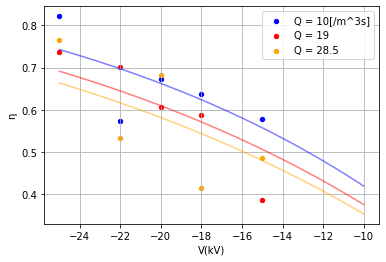

In [108]:
plt.scatter(v,eta_10,label = 'Q = 10[/m^3s]',color = 'blue',s = 19)
plt.scatter(v,eta_19,label = 'Q = 19',color = 'red', s= 19)
plt.scatter(v,eta_28,label = 'Q = 28.5',color = 'orange', s = 19)



plt.plot(v_th,eta_th10,color = 'blue',alpha = 0.5)
plt.plot(v_th,eta_th19,color = 'red',alpha = 0.5)
plt.plot(v_th,eta_th28,color = 'orange',alpha = 0.5)

#plt.plot(v_th,eta_th10,'.',label = 'Q = 10')
#plt.plot(v_th,eta_th10,'.',label = 'Q = 10')

plt.legend()
plt.grid()
plt.xlabel('V(kV)')
plt.ylabel('η')
plt.savefig('dust_efficiency_3.png')


In [125]:
df2

,Q = 28.5,N0,Nr,dust num,eta,Q = 19,N0.1,Nr.1,dust num.1,eta.1,Q = 10,N0.2,Nr.2,dust num.2,eta.2
0,0,38560000,39060000,-500000,NaN,NaN,38620000,37260000,1360000,NaN,NaN,38200000,37080000,1120000,NaN
1,-15,37920000,19480000,18940000,0.486287,NaN,37140000,22840000,12940000,0.385030,NaN,34160000,14380000,18660000,0.579040
2,-18,37480000,21960000,16020000,0.414088,NaN,36960000,15220000,20380000,0.588203,NaN,31840000,11540000,19180000,0.637563
3,-20,37720000,11960000,26260000,0.682927,NaN,35020000,13800000,19860000,0.605939,NaN,22320000,7274000,13926000,0.674104
4,-22,37580000,17540000,20540000,0.533262,NaN,36140000,10796000,23984000,0.701273,NaN,22674000,9676000,11878000,0.573256
5,-25,37800000,8834000,29466000,0.766296,NaN,26400000,6944000,18096000,0.736970,NaN,16500000,2940000,12440000,0.821818
6,size of dust5e-7,N0,Nr,dust num,NaN,NaN,N0,Nr,dust num,NaN,NaN,N0,Nr,dust num,NaN
7,0,5238470.776621,5465916.733387,-227445.956765,NaN,NaN,5678086.469175,5280904.723779,397181.745396,NaN,NaN,5802417.934347,5384019.215372,418398.718975,NaN
8,-15,5198158.526821,1590424.339472,3835180.144115,0.694041,NaN,5284299.439552,2095388.310649,2791729.383507,0.603469,NaN,4483146.517214,1159295.436349,2905452.36189,0.741410
9,-18,5048000,1180000,4095445.956765,0.766244,NaN,4978000,1015400,3565418.254604,0.796022,NaN,3944000,522200,3003401.281025,0.867596


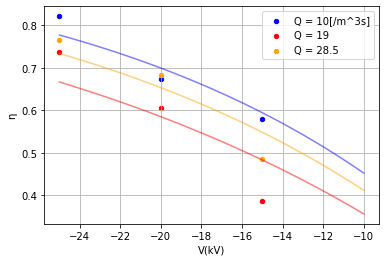

In [111]:
df2 = pd.read_excel(excel_name, sheet_name = 7,skiprows=2)
## Q = 28.5
v  = df2['Q = 28.5'][1:4]
eta_28 = df2['eta'][1:4]
#eta_28
v = -v.astype(float)
## Q = 19
eta_19 = df2['eta.1'][1:4]
#eta_19

## Q = 10
eta_10 = df2['eta.2'][1:4]
eta_10

param_10_2, cov_10 = curve_fit(exp_fit, -v, eta_10)
param_19_2, cov_19 = curve_fit(exp_fit, -v, eta_19)
param_28_2, cov_28 = curve_fit(exp_fit, -v, eta_28)

v_th = np.linspace(-10,-25,100)
eta_th10_2 = 1-np.exp(-param_10_2[0]*v_th)
eta_th19_2 = 1-np.exp(-param_19_2[0]*v_th)
eta_th28_2 = 1-np.exp(-param_28_2[0]*v_th)

plt.scatter(-v,eta_10,label = 'Q = 10[/m^3s]',color = 'blue',s = 19)
plt.scatter(-v,eta_19,label = 'Q = 19',color = 'red', s= 19)
plt.scatter(-v,eta_28,label = 'Q = 28.5',color = 'orange', s = 19)



plt.plot(v_th,eta_th10_2,color = 'blue',alpha = 0.5)
plt.plot(v_th,eta_th19_2,color = 'red',alpha = 0.5)
plt.plot(v_th,eta_th28_2,color = 'orange',alpha = 0.5)

#plt.plot(v_th,eta_th10,'.',label = 'Q = 10')
#plt.plot(v_th,eta_th10,'.',label = 'Q = 10')

plt.legend()
plt.grid()
plt.xlabel('V(kV)')
plt.ylabel('η')
plt.savefig('dust_3.png')



In [110]:
v

1    15.0
2    20.0
3    25.0
Name: Q = 28.5, dtype: float64

In [123]:
df2 = pd.read_excel(excel_name, sheet_name = 2,skiprows=2)
df2

,Q = 28.5,N0,Nr,dust num,eta,Q = 19,N0.1,Nr.1,dust num.1,eta.1,Q = 10,N0.2,Nr.2,dust num.2,eta.2
0,0,38560000,39060000,-500000,NaN,NaN,38620000,37260000,1360000,NaN,NaN,38200000,37080000,1120000,NaN
1,-15,37920000,19480000,18940000,0.486287,NaN,37140000,22840000,12940000,0.385030,NaN,34160000,14380000,18660000,0.579040
2,-18,37480000,21960000,16020000,0.414088,NaN,36960000,15220000,20380000,0.588203,NaN,31840000,11540000,19180000,0.637563
3,-20,37720000,11960000,26260000,0.682927,NaN,35020000,13800000,19860000,0.605939,NaN,22320000,7274000,13926000,0.674104
4,-22,37580000,17540000,20540000,0.533262,NaN,36140000,10796000,23984000,0.701273,NaN,22674000,9676000,11878000,0.573256
5,-25,37800000,8834000,29466000,0.766296,NaN,26400000,6944000,18096000,0.736970,NaN,16500000,2940000,12440000,0.821818
6,size of dust5e-7,N0,Nr,dust num,NaN,NaN,N0,Nr,dust num,NaN,NaN,N0,Nr,dust num,NaN
7,0,5238470.776621,5465916.733387,-227445.956765,NaN,NaN,5678086.469175,5280904.723779,397181.745396,NaN,NaN,5802417.934347,5384019.215372,418398.718975,NaN
8,-15,5198158.526821,1590424.339472,3835180.144115,0.694041,NaN,5284299.439552,2095388.310649,2791729.383507,0.603469,NaN,4483146.517214,1159295.436349,2905452.36189,0.741410
9,-18,5048000,1180000,4095445.956765,0.766244,NaN,4978000,1015400,3565418.254604,0.796022,NaN,3944000,522200,3003401.281025,0.867596


# dust size 5e-6

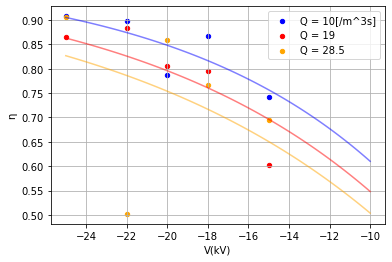

In [124]:
df2 = pd.read_excel(excel_name, sheet_name = 2,skiprows=2)


## Q = 28.5
v  = df2['Q = 28.5'][8:13]
eta_28 = df2['eta'][8:13]
#eta_28
v = v.astype(float)
## Q = 19
eta_19 = df2['eta.1'][8:13]
#eta_19

## Q = 10
eta_10 = df2['eta.2'][8:13]
eta_10

param_10_2, cov_10 = curve_fit(exp_fit, v, eta_10)
param_19_2, cov_19 = curve_fit(exp_fit, v, eta_19)
param_28_2, cov_28 = curve_fit(exp_fit, v, eta_28)

v_th = np.linspace(-10,-25,100)
eta_th10_2 = 1-np.exp(-param_10_2[0]*v_th)
eta_th19_2 = 1-np.exp(-param_19_2[0]*v_th)
eta_th28_2 = 1-np.exp(-param_28_2[0]*v_th)

plt.scatter(v,eta_10,label = 'Q = 10[/m^3s]',color = 'blue',s = 19)
plt.scatter(v,eta_19,label = 'Q = 19',color = 'red', s= 19)
plt.scatter(v,eta_28,label = 'Q = 28.5',color = 'orange', s = 19)



plt.plot(v_th,eta_th10_2,color = 'blue',alpha = 0.5)
plt.plot(v_th,eta_th19_2,color = 'red',alpha = 0.5)
plt.plot(v_th,eta_th28_2,color = 'orange',alpha = 0.5)

#plt.plot(v_th,eta_th10,'.',label = 'Q = 10')
#plt.plot(v_th,eta_th10,'.',label = 'Q = 10')

plt.legend()
plt.grid()
plt.xlabel('V(kV)')
plt.ylabel('η')
plt.savefig('dust_5.png')



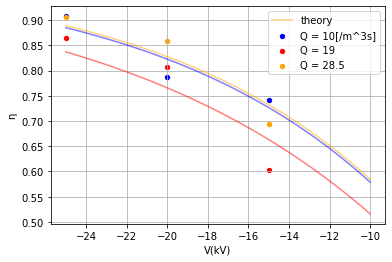

In [121]:
df2 = pd.read_excel(excel_name, sheet_name = 7,skiprows=2)


## Q = 28.5
v  = df2['Q = 28.5'][6:9]
eta_28 = df2['eta'][6:9]
#eta_28
v = v.astype(float)
## Q = 19
eta_19 = df2['eta.1'][6:9]
#eta_19

## Q = 10
eta_10 = df2['eta.2'][6:9]
eta_10

param_10_2, cov_10 = curve_fit(exp_fit, v, eta_10)
param_19_2, cov_19 = curve_fit(exp_fit, v, eta_19)
param_28_2, cov_28 = curve_fit(exp_fit, v, eta_28)

v_th = np.linspace(-10,-25,100)
eta_th10_2 = 1-np.exp(-param_10_2[0]*v_th)
eta_th19_2 = 1-np.exp(-param_19_2[0]*v_th)
eta_th28_2 = 1-np.exp(-param_28_2[0]*v_th)

plt.scatter(v,eta_10,label = 'Q = 10[/m^3s]',color = 'blue',s = 19)
plt.scatter(v,eta_19,label = 'Q = 19',color = 'red', s= 19)
plt.scatter(v,eta_28,label = 'Q = 28.5',color = 'orange', s = 19)



plt.plot(v_th,eta_th10_2,color = 'blue',alpha = 0.5)
plt.plot(v_th,eta_th19_2,color = 'red',alpha = 0.5)
plt.plot(v_th,eta_th28_2,label = 'theory',color = 'orange',alpha = 0.5)

#plt.plot(v_th,eta_th10,'.',label = 'Q = 10')
#plt.plot(v_th,eta_th10,'.',label = 'Q = 10')

plt.legend()
plt.grid()
plt.xlabel('V(kV)')
plt.ylabel('η')
plt.savefig('dust_5.png')

